In [1]:
# To find ECD Control

import sys 
sys.path.append('C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram')


In [2]:
import numpy as np
from qutip import *
from ECD_batch_optimizerV1 import BatchOptimizer
import matplotlib.pyplot as plt


Need tf version 2.3.0 or later. Using tensorflow version: 2.7.0



In [3]:
%load_ext autoreload
%autoreload 2

In [124]:
#The target oscillator state.
N =15
Fock = 1
psi_i = [tensor(basis(2,0), basis(N,0)), tensor(basis(2,0), basis(N,1))] # initial state
psi_t = [tensor(basis(2,0), basis(N,1)), tensor(basis(2,0), basis(N,0))] #target state

In [125]:
#Optimization of ECD Circuit parameters (betas, phis, and thetas)
#the optimization options
opt_params = {
'N_blocks' : 7, #circuit depth
'N_multistart' : 30, #Batch size (number of circuit optimizations to run in parallel)
'epochs' : 200, #number of epochs before termination
'epoch_size' : 10, #number of adam steps per epoch
'learning_rate' : 0.001, #adam learning rate
'term_fid' : 0.999, #terminal fidelitiy
'dfid_stop' : 1e-6, #stop if dfid between two epochs is smaller than this number
'beta_scale' : 3.0, #maximum |beta| for random initialization
'initial_states' : psi_i, #qubit tensor oscillator, start in |g> |0>
'target_states' : psi_t, #end in |e> |target>.
'name' : 'Fock %d' % Fock, #name for printing and saving
'filename' : None, #if no filename specified, results will be saved in this folder under 'name.h5'
}


#note: optimizer includes pi pulse in every ECD step. However, final ECD step is implemented 
#in experiment as a displacement since the qubit and oscillator should be disentangled at this point.
#So, we ask the optimizer to end in |e> |target> instead of |g>|target>.

#### Filename for angles to be stored

In [126]:
#create optimization object. 
#initial params will be randomized upon creation
opt = BatchOptimizer(**opt_params)

#print optimization info. 
opt.print_info()

None
Tensor("alphas:0", shape=(1, 30), dtype=complex64)
Tensor("alphas:0", shape=(7, 30), dtype=complex64)
optimization_type: state transfer
N_multistart: 30
N_blocks: 7
term_fid: 0.999
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.001
epoch_size: 10
epochs: 200
beta_scale: 3.0
alpha_scale: 1.0
theta_scale: 3.141592653589793
use_displacements: False
use_phase: False
name: Fock 1
comment: 
user_angles: None
N_cav: 15
filename: Fock 1.h5

Best circuit parameters found:
betas:         [ 0.64876-0.11297j  0.04999+0.2609j  -0.7985 +2.60539j -1.09128-1.06048j
  0.16908+2.08897j -1.10973+0.57254j -0.28251+1.65501j]
alphas:        [0.+0.j]
phis (deg):    [   0.       137.36574 -178.51973 -113.35403   44.68457  -54.10552
 -171.32559]
thetas (deg):  [-174.27254  -43.45888  -86.61487 -120.6069  -146.0041    32.44919
 -162.09862]
Max Fidelity:  0.085085




In [127]:
#run optimizer.
opt.optimize()

Start time: 2023-01-31 05:46:10
 Epoch: 200 / 200 Max Fid: 0.983530 Avg Fid: 0.821516 Max dFid: 0.002669 Avg dFid: 0.000336 Elapsed time: 0:01:02.497144 Remaing time: 0:00:00.312448

Optimization stopped.  Reached maximum number of epochs. Terminal fidelity not reached.

optimization_type: state transfer
N_multistart: 30
N_blocks: 7
term_fid: 0.999
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.001
epoch_size: 10
epochs: 200
beta_scale: 3.0
alpha_scale: 1.0
theta_scale: 3.141592653589793
use_displacements: False
use_phase: False
name: Fock 1
comment: 
user_angles: None
N_cav: 15
filename: Fock 1.h5

Best circuit parameters found:
betas:         [-0.26329+0.00743j -0.05813+0.74152j  0.94994-0.00961j -0.03851-1.98229j
  1.05113-0.00824j  0.0221 +0.65212j -0.1618 +0.00105j]
alphas:        [0.+0.j]
phis (deg):    [   0.       104.04608  111.01305 -111.26677  -49.76103 -129.93219
 -145.42325]
thetas (deg):  [-52.57244  73.47837 -90.69933 -90.55493  91.26153 -90.06116 -90.42225]
Max Fide

'2023-01-31 05:46:10'

In [128]:
#can print info, including the best circuit found.
opt.print_info() 

optimization_type: state transfer
N_multistart: 30
N_blocks: 7
term_fid: 0.999
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.001
epoch_size: 10
epochs: 200
beta_scale: 3.0
alpha_scale: 1.0
theta_scale: 3.141592653589793
use_displacements: False
use_phase: False
name: Fock 1
comment: 
user_angles: None
N_cav: 15
filename: Fock 1.h5

Best circuit parameters found:
betas:         [-0.26329+0.00743j -0.05813+0.74152j  0.94994-0.00961j -0.03851-1.98229j
  1.05113-0.00824j  0.0221 +0.65212j -0.1618 +0.00105j]
alphas:        [0.+0.j]
phis (deg):    [   0.       104.04608  111.01305 -111.26677  -49.76103 -129.93219
 -145.42325]
thetas (deg):  [-52.57244  73.47837 -90.69933 -90.55493  91.26153 -90.06116 -90.42225]
Max Fidelity:  0.983531




In [129]:
angles_filename = 'test_opt_angles1.txt'
opt.save_angles(filename = angles_filename)

# Get Pulses

In [130]:
from Simulation_Classes_Single_ModeV2 import *
# Classes: ecd_pulse_single_mode to get pulses
#          , qutip_sim_single_mode to simulate on qutip

In [131]:
pulse_sim = ecd_pulse_single_mode(param_file = angles_filename,
                                 kappa = 1/(2e+6))   #T1 = 2ms

In [132]:
pulse_sim.get_pulses()

Modified method: Cond Disp Circuit
Modified conditional displacement called
---------------------------
Final Displacement: 0.26337749621825207
Modified conditional displacement called


C:\Users\Eesh Gupta\anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


---------------------------
Final Displacement: 0.7437948639536035
Modified conditional displacement called
---------------------------
Final Displacement: 0.9499868654377672
Modified conditional displacement called
---------------------------
Final Displacement: 1.9826634891773707
Modified conditional displacement called
---------------------------
Final Displacement: 1.0511602012220163
Modified conditional displacement called
---------------------------
Final Displacement: 0.6524916145230105
Modified conditional displacement called
---------------------------
Final Displacement: 0.16179583840959352


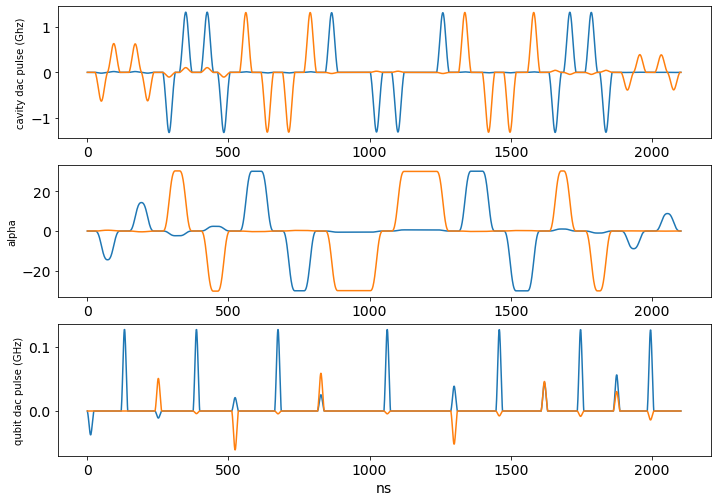

In [133]:
pulse_sim.plot_pulses()

# Qutip Simulation

In [134]:
qutip_sim  = qutip_sim_single_mode(n_q = 2, n_c = N, alpha = pulse_sim.alpha, qubit_pulse = pulse_sim.qubit_dac_pulse_GHz)

In [135]:
# Add various terms 

# to the hamiltonian 
qutip_sim.add_bare_qubit_mode_coupling() # chi/2 adag a sigmaz
qutip_sim.add_stark_shift() # chi/2 alpha^2 sigmaz

# to the collapse operators (noise)
#qutip_sim.add_qubit_relaxation(T1 = 30e+3) # T1 in nanoseconds
#qutip_sim.add_qubit_dephasing(T1 = 30e+3, Techo = 50e+3) # T1, T2 in nanoseconds
#qutip_sim.add_cavity_relaxation(T1 = 2e+6) # assumes kappa correction to equation of motion in pulses
#qutip_sim.add_cavity_dephasing(T1 = 2e+6, Techo = 3e+6) # T1, T2 from photon blockade paper


In [138]:
qutip_sim.me_solve(initial = psi_i[0])  #initial state by default is g0

Loaded list object.


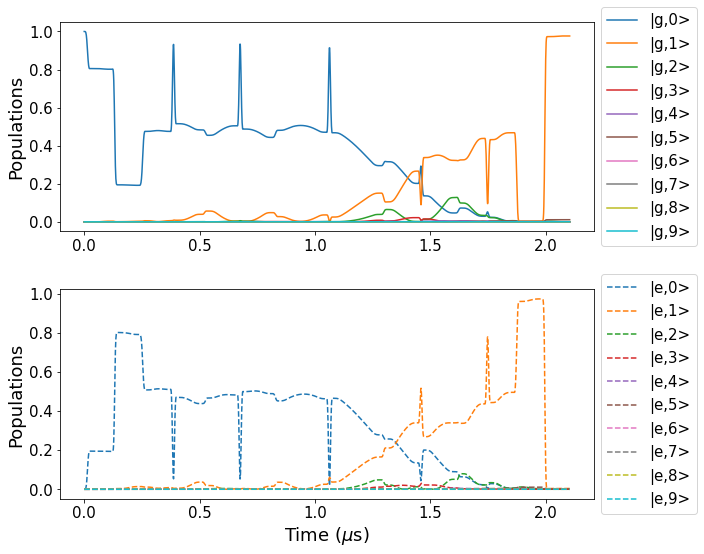

In [139]:
qutip_sim.plot_populations_single_mode()

In [85]:
qutip_sim.get_fidelity(target=psi_t[0])

(0.9765912320499447+0j)

In [140]:
qutip_sim.me_solve(initial = psi_i[0])
qutip_sim.get_fidelity(target=psi_t[0])

(0.9762700538404759+0j)

In [141]:
qutip_sim.me_solve(initial = psi_i[1])
qutip_sim.get_fidelity(target=psi_t[1])

(0.9854823947870868+0j)

In [70]:
opt.best_fidelity()

0.49813443

# Applying ECD angles to DECD

In [142]:
sys.path.append(r'C:\Users\Eesh Gupta\Documents\RU Research\Chakram\Multimode-Conditional-Displacements\hpc_runs\two_mode_ecd\class_description')
from Simulation_Classes_Two_ModeV5 import *

In [143]:
# pulse_sim = ecd_pulse_single_mode(param_file = ,
#                                  kappa = 1/(2e+6))   #T1 = 2ms

In [144]:
T1_mode1 = 2e+6 #2ms
T1_mode2 = 2e+6 #2ms

pulse_sim = ecd_pulse_two_mode(param_file = 'DECD_angles_check.txt',
                              kappa1 = 1/T1_mode1,
                              kappa2 = 1/T1_mode2)

In [145]:
pulse_sim.get_pulses()

---------------------------------------------------
final displacement is 0.2633915280350342


C:\Users\Eesh Gupta\anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


---------------------------------------------------
final displacement is 0.2633915280350342
---------------------------------------------------
final displacement is 0.7437948639536054
---------------------------------------------------
final displacement is 0.7437948639536054
---------------------------------------------------
final displacement is 0.9499868654377668
---------------------------------------------------
final displacement is 0.9499868654377668
---------------------------------------------------
final displacement is 1.9826634891773713
---------------------------------------------------
final displacement is 1.9826634891773713
---------------------------------------------------
final displacement is 1.051160201222016
---------------------------------------------------
final displacement is 1.051160201222016
---------------------------------------------------
final displacement is 0.6524916145230125
---------------------------------------------------
final displacement i

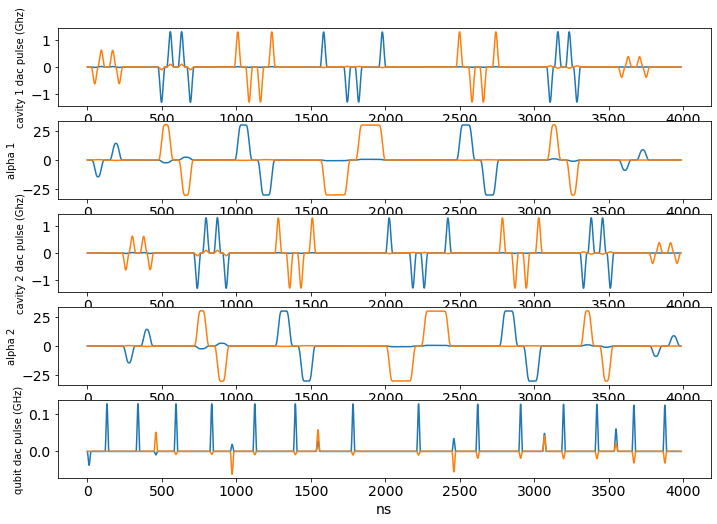

In [146]:
pulse_sim.plot_pulses()

In [147]:
qutip_sim  = qutip_sim_two_mode(n_q = 2, n_c1 = 15, n_c2 = 15, alpha1 = pulse_sim.alpha1, alpha2 = pulse_sim.alpha2, qubit_pulse = pulse_sim.qubit_dac_pulse_GHz)

In [148]:
qutip_sim.add_bare_qubit_mode_coupling() # chi/2 adag a sigmaz
#qutip_sim.add_mode_mode_coupling()
qutip_sim.add_stark_shift() # chi/2 alpha^2 sigmaz

In [149]:
psi_i_tm = tensor(basis(2,0), basis(N,0),basis(N,1 ))#tm = 2 mode
psi_t_tm = tensor(basis(2,0), basis(N,1),basis(N,0 ))
qutip_sim.me_solve(initial = psi_i_tm)  #initial state by default is g0

C:\Users\Eesh Gupta\anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


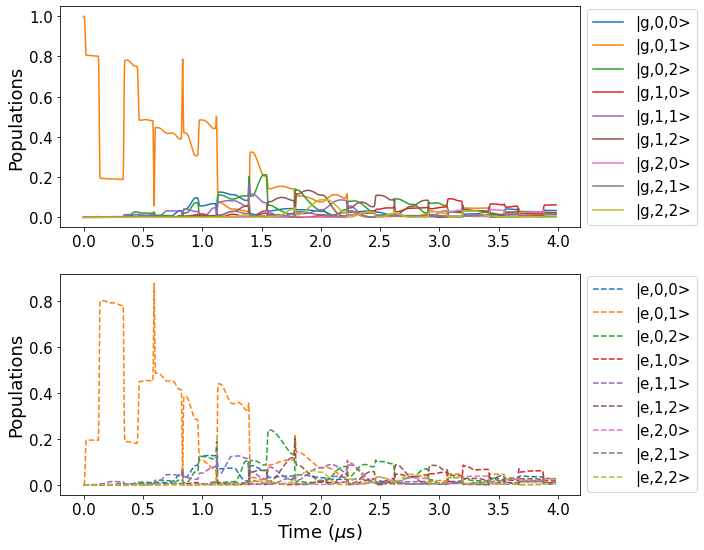

In [150]:
qutip_sim.plot_populations()

# Checking via Calculator

In [ ]:
from qutip import *

In [164]:
def mod_disp_op(disp, n_q, n_c):
    '''
    Returns displacement operator using baken campbell formula
    '''
    pauli_like_x = (create(n_c) + destroy(n_c))
    pauli_like_y = (1j)*(create(n_c) - destroy(n_c))
    comm = (1/2)*((pauli_like_x*pauli_like_y) - (pauli_like_y*pauli_like_x))
    re = np.real(disp)
    im = np.imag(disp)

    first = (1j*im*pauli_like_x).expm()
    second = (-1j*re*pauli_like_y).expm()
    third = ((im*re)*(-1)*comm).expm()
    return first*second*third

def disp_op(disp, n_q, n_c):
    '''
    Returns displacement operator for specified displacement
    '''
    #disp = normalize_complex(disp)
    exponent = (disp*create(n_c))- (np.conjugate(disp)*destroy(n_c))
    return  exponent.expm()

def cond_disp_op(beta, n_q, n_c1, n_c2,mode, use_mod):
    '''
    Returns cond displacement operator for specified real displacement
    '''
    disp = beta/2
    
    n_c = n_c1 if mode == 1 else n_c2
    
    if use_mod: 
        d = mod_disp_op(disp= disp, n_q = n_q, n_c = n_c) #Baker Campbell Approx
    else: 
        d = disp_op(disp= disp, n_q = n_q, n_c = n_c)
    d_adjoint = d.dag()
    
    if mode == 1: 
        left = tensor(create(n_q), d, qeye(n_c2)) #D(beta/2)|e><g|
        right = tensor(destroy(n_q), d_adjoint, qeye(n_c2)) #D(-beta/2)|g><e|   ...not sure d_adjoint(alpha) = d(-alpha) if use Baker
    
    else: #mode ==2 
        left = tensor(create(n_q), qeye(n_c2), d)
        right = tensor(destroy(n_q),  qeye(n_c2), d_adjoint)
    return left+right

def qubit_rot(phi, theta, n_q, n_c1, n_c2):
    '''
    Returns qubit rotation
    '''
    rot = (np.cos(phi)*sigmax()) + (np.sin(phi)*sigmay())
    exp = (-1.0j)*(theta/2)*(rot)
    return tensor(exp.expm(), qeye(n_c1), qeye(n_c2) )

def normalize_complex(number):
    '''
    Returns radius r of complex number z = r*e^iphi
    '''
    return np.sqrt(number.real**2 + (number .imag**2))

def dot(state1, state2):
    '''
    dotting both states
    '''
    fid = state1.overlap(state2)
    return fid*np.conjugate(fid)
def evolve(initial_state, betas, gammas, phis, thetas, n_q, n_c1, n_c2, use_mod = False):
    '''
    Operates on initial_state with ECD(beta_n)*R(phi_n, theta_n) *...........*ECD(beta_1)*R(phi_1, theta_1)
    '''
    n = len(betas)
    state = initial_state
    for i in range(n):
        beta = betas[i]
        gamma = gammas[i]
        phi = phis[i]
        theta = thetas[i]
        
  
    
        #state = cond_disp_op(gamma, n_q, n_c1,n_c2,mode = 2,use_mod = use_mod)*cond_disp_op(beta, n_q, n_c1,n_c2, mode = 1,use_mod = use_mod)*qubit_rot(phi, theta, n_q, n_c1, n_c2)*state
        state = cond_disp_op(beta, n_q, n_c1,n_c2, mode = 1,use_mod = use_mod)*cond_disp_op(gamma, n_q, n_c1,n_c2,mode = 2,use_mod = use_mod)*qubit_rot(phi, theta, n_q, n_c1, n_c2)*state
        #need to add extra pi pulse because ECD single mode doesn't take into account that second mode also flips qubit
        #state = tensor(sigmax(), qeye(n_c1), qeye(n_c2) )*state
           
    return state
        

In [165]:
betas = opt.best_circuit()['betas']
gammas = betas
phis = opt.best_circuit()['phis']
thetas = opt.best_circuit()['thetas']

In [166]:
target = evolve(psi_i_tm, betas, gammas, phis, thetas, n_q=2, n_c1=N, n_c2=N, use_mod = False)

In [167]:
dot(target, psi_t_tm)

(0.0553011555657624+0j)

In [168]:
target

Quantum object: dims = [[2, 15, 15], [1, 1, 1]], shape = (450, 1), type = ket
Qobj data =
[[ 6.50954011e-02-1.87067395e-01j]
 [ 1.08809291e-01+9.95844502e-02j]
 [-4.96107166e-02+1.05288493e-02j]
 [-1.67991035e-01+1.36592477e-01j]
 [-9.93226909e-03-6.92319440e-02j]
 [ 2.94965257e-02-1.78189419e-01j]
 [-5.69746592e-02-3.80067583e-02j]
 [-3.45922444e-02-2.69955548e-03j]
 [ 2.68516507e-02-2.76465921e-03j]
 [ 4.28587199e-03+1.42540167e-02j]
 [ 9.31716945e-03+1.18320459e-02j]
 [-8.06841077e-03-2.37732965e-03j]
 [ 2.33826998e-03-3.52194549e-03j]
 [-1.11872678e-04-5.00422692e-04j]
 [-1.88070726e-03+2.08524246e-04j]
 [ 1.95334166e-01-1.30941663e-01j]
 [ 1.02811370e-01+4.56210893e-02j]
 [ 1.49515380e-01-6.08695582e-02j]
 [ 8.12979655e-03+8.22033796e-02j]
 [-4.41620559e-02+2.87591404e-01j]
 [ 1.04594872e-01+7.00714048e-02j]
 [ 7.30560019e-02+2.49285388e-03j]
 [-6.56185685e-02+5.74180087e-03j]
 [-9.11662120e-03-3.55446985e-02j]
 [-2.53872330e-02-3.20012899e-02j]
 [ 2.34695748e-02+6.81007108e-03j]
